<a href="https://colab.research.google.com/github/Bhupendra-glitch/End-to-End-ML-with-Deployment/blob/main/End_To_End_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview of DataSet**

the dataset contain comprehensive records of Indian Premier League (IPL) matches, including ball-by-ball data, player performance, and team stat.. It provide details insight into runs, scored,wickets taken, extras, dismissal types and match result.



**Objective of the Analysis**

The primary goal od thisnproject is to perform Exploratory data Analysis(EDA) to uncover patterns in IPL matches and develop an API that provide useful criket insight to developer.

*Analysis objectives*
1. understand teram performance across seasons
2. Identify top-performing players
3. Analysis tends in scoring, bowling and match outcome.
4. explore factirs influcing match result
5. generat visulal insight to support data-driven conclusion.



**Import liberies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading and inspecting the dataset**

In [2]:
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
matches.describe()


,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [8]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [9]:
matches.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [10]:
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [11]:
def style_dataframe(df):
    styled_df = df.style \
        .set_table_styles([
            # Header styling - sleek dark theme
            {'selector': 'thead th', 'props': [
                ('background-color', '#1F2A40'),  # Dark navy
                ('color', 'white'),
                ('font-size', '14px'),
                ('font-weight', 'bold'),
                ('padding', '12px'),
                ('text-align', 'center'),
                ('border', '2px solid #1F2A40')
            ]},
            # Cell styling - clean and professional
            {'selector': 'td', 'props': [
                ('border', '1px solid #ddd'),
                ('padding', '10px'),
                ('text-align', 'center'),
                ('font-size', '13px'),
                ('color', '#333')
            ]},
            # Alternating row colors for readability
            {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f5f5f5')]},
            {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
            # Hover effect - light gray for better UX
            {'selector': 'tbody tr:hover', 'props': [('background-color', '#e3e6ea')]}
        ]) \
        .set_table_attributes('style="margin-left:auto; margin-right:auto; border-collapse: collapse; width: 95%; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.1);"') \
        .hide(axis="index")  # Hides the index column

    return styled_df

**Exploratory Data Analysis**

*All Teams*

In [12]:
merged_df = deliveries.merge(matches,how='left',left_on='match_id', right_on='id')


In [13]:
def all_teams():
  temp =pd.concat([matches['team1'], matches['team2']]).unique()
  return {"team":temp}

In [14]:
all_teams()

{'team': array(['Royal Challengers Bangalore', 'Kings XI Punjab',
        'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
        'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Gujarat Lions', 'Rising Pune Supergiants',
        'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
        'Lucknow Super Giants', 'Gujarat Titans',
        'Royal Challengers Bengaluru'], dtype=object)}

**All Players**

In [15]:
def all_players():
  temp = pd.concat([deliveries['batter'], deliveries['bowler']]).unique()
  return {"players":temp}

**Team Analysis**

*team vs team *

In [16]:
team1 = 'Kolkata Knight Riders'
team2 = 'Royal Challengers Banglore'

In [17]:
def teamVteam(team1,team2):
    temp_df = matches[((matches['team1'] == team1) & (matches['team2'] == team2)) |
        ((matches['team1'] == team2) & (matches['team2'] == team1))]
    total_matches = temp_df.shape[0]
    team1_wins = temp_df[temp_df['winner'] == team1].shape[0]
    team2_wins = temp_df[temp_df['winner'] == team2].shape[0]
    team1_win_per = (team1_wins/total_matches)*100
    team2_win_per = (team2_wins/total_matches)*100

    dic = {
        'team1' : team1,
        'team2' : team2,
        'total_matches':total_matches,
        'wins':{
            team1 : team1_wins,
            team2 : team2_wins
        },
        'winning_perc':{
            team1 : team1_win_per,
            team2 : team2_win_per
        }

    }
    return dic

In [18]:
teamVteam('Chennai Super Kings', 'Mumbai Indians')

{'team1': 'Chennai Super Kings',
 'team2': 'Mumbai Indians',
 'total_matches': 37,
 'wins': {'Chennai Super Kings': 17, 'Mumbai Indians': 20},
 'winning_perc': {'Chennai Super Kings': 45.94594594594595,
  'Mumbai Indians': 54.054054054054056}}

In [19]:
teamVteam('Chennai Super Kings', 'Kings XI Punjab')

{'team1': 'Chennai Super Kings',
 'team2': 'Kings XI Punjab',
 'total_matches': 23,
 'wins': {'Chennai Super Kings': 14, 'Kings XI Punjab': 9},
 'winning_perc': {'Chennai Super Kings': 60.86956521739131,
  'Kings XI Punjab': 39.130434782608695}}

**Team Record**

In [20]:
team = 'Kighs XI Punjab'

In [21]:
import pandas as pd

def team_record(team):
    # Filter all matches where the given team played
    temp_df = matches[(matches['team1'] == team) | (matches['team2'] == team)]

    # Overall stats
    total_matches = temp_df.shape[0]
    total_wins = (temp_df['winner'] == team).sum()
    total_draws = temp_df['winner'].isnull().sum()
    total_loss = ((temp_df['winner'] != team) & temp_df['winner'].notna()).sum()
    winning_perc = (total_wins / total_matches) * 100 if total_matches > 0 else 0
    title_wons = temp_df[(temp_df['winner'] == team) & (temp_df['match_type'] == 'Final')].shape[0]

    # Get all unique opponent teams
    teams = pd.concat([temp_df['team1'], temp_df['team2']]).unique()

    # Create a dictionary for records against each opponent
    opponent_stats = {}
    for opponent in teams:
        if opponent != team:
            opponent_df = temp_df[(temp_df['team1'] == opponent) | (temp_df['team2'] == opponent)]
            total_won = (opponent_df['winner'] == team).sum()
            total_matches_vs = opponent_df.shape[0]
            total_loss_vs = ((opponent_df['winner'] != team) & opponent_df['winner'].notna()).sum()
            total_draws_vs = opponent_df['winner'].isnull().sum()
            winning_perc_vs = (total_won / total_matches_vs) * 100 if total_matches_vs > 0 else 0

            opponent_stats[opponent] = {
                'total_matches': total_matches_vs,
                'total_wins': total_won,
                'total_draws': total_draws_vs,
                'total_loss': total_loss_vs,
                'winning_perc': round(winning_perc_vs, 2)
            }

    # Final dictionary output
    return {
        team: {
            'overall': {
                'match_played': total_matches,
                'won': total_wins,
                'loss': total_loss,
                'draws': total_draws,
                'winning_perc': round(winning_perc, 2),
                'titles': title_wons
            },
            'against': opponent_stats
        }
    }



In [22]:
team_record('Mumbai Indians')

{'Mumbai Indians': {'overall': {'match_played': 261,
   'won': np.int64(144),
   'loss': np.int64(117),
   'draws': np.int64(0),
   'winning_perc': np.float64(55.17),
   'titles': 5},
  'against': {'Chennai Super Kings': {'total_matches': 37,
    'total_wins': np.int64(20),
    'total_draws': np.int64(0),
    'total_loss': np.int64(17),
    'winning_perc': np.float64(54.05)},
   'Kings XI Punjab': {'total_matches': 26,
    'total_wins': np.int64(14),
    'total_draws': np.int64(0),
    'total_loss': np.int64(12),
    'winning_perc': np.float64(53.85)},
   'Kolkata Knight Riders': {'total_matches': 34,
    'total_wins': np.int64(23),
    'total_draws': np.int64(0),
    'total_loss': np.int64(11),
    'winning_perc': np.float64(67.65)},
   'Deccan Chargers': {'total_matches': 10,
    'total_wins': np.int64(6),
    'total_draws': np.int64(0),
    'total_loss': np.int64(4),
    'winning_perc': np.float64(60.0)},
   'Delhi Daredevils': {'total_matches': 22,
    'total_wins': np.int64(11),
 

***Top 5 team stats***

/tmp/ipython-input-2676332074.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams['winning_perc'], palette=['#1F2A40', '#2C3E50', '#34495E', '#3B5998', '#4A90E2'], ax=axes[1])
/tmp/ipython-input-2676332074.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_teams.index, rotation=45, fontsize=12, color="#1F2A40")
/tmp/ipython-input-2676332074.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams['titles'], palette="Blues", ax=axes[2])
/tmp/ipython-input-2676332074.py:51: UserWarning: set_ticklabels() should only be use

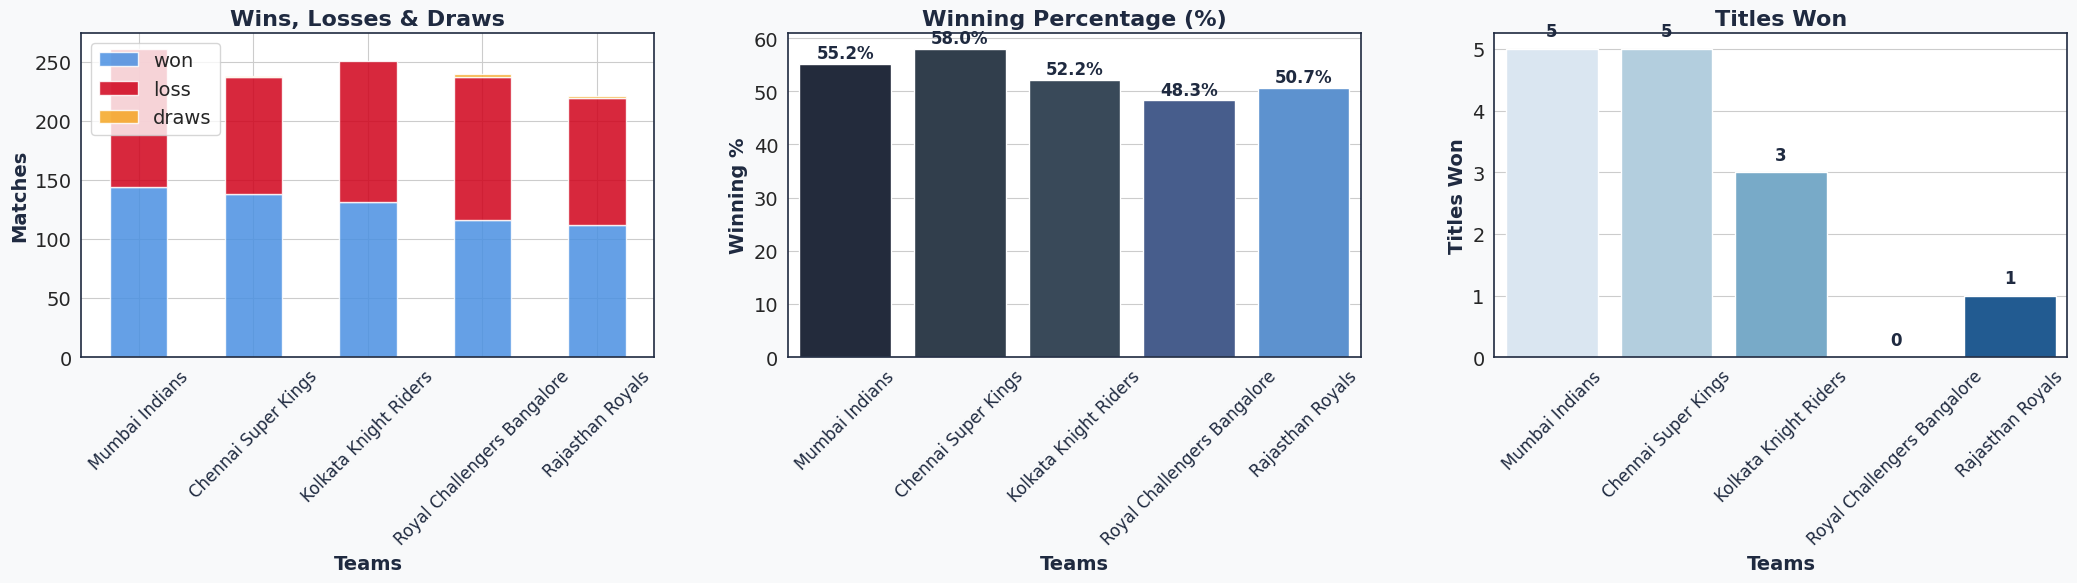

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style and global parameters
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.labelweight": "bold",
    "axes.edgecolor": "#1F2A40",
    "axes.linewidth": 1.2
})

# Get team records for all teams
teams = matches['team1'].unique()
team_stats = [team_record(team)[team]['overall'] for team in teams]
team_df = pd.DataFrame(team_stats, index=teams)

# Select Top 5 Teams based on Wins
top_teams = team_df.sort_values(by='won', ascending=False).head(5)

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 7), facecolor="#f8f9fa")  # Light gray background

# Plot 1: Stacked Bar Chart for Wins, Losses, and Draws
top_teams[['won', 'loss', 'draws']].plot(
    kind='bar', stacked=True,
    color=["#4A90E2", "#D0021B", "#F5A623"],  # Custom colors
    alpha=0.85, ax=axes[0]
)
axes[0].set_title("Wins, Losses & Draws", fontsize=16, fontweight="bold", color="#1F2A40")
axes[0].set_xlabel("Teams", fontsize=14, color="#1F2A40")
axes[0].set_ylabel("Matches", fontsize=14, color="#1F2A40")
axes[0].set_xticklabels(top_teams.index, rotation=45, fontsize=12, color="#1F2A40")

# Plot 2: Winning Percentage Comparison
sns.barplot(x=top_teams.index, y=top_teams['winning_perc'], palette=['#1F2A40', '#2C3E50', '#34495E', '#3B5998', '#4A90E2'], ax=axes[1])
axes[1].set_title("Winning Percentage (%)", fontsize=16, fontweight="bold", color="#1F2A40")
axes[1].set_xlabel("Teams", fontsize=14, color="#1F2A40")
axes[1].set_ylabel("Winning %", fontsize=14, color="#1F2A40")
axes[1].set_xticklabels(top_teams.index, rotation=45, fontsize=12, color="#1F2A40")

# Add annotations
for index, value in enumerate(top_teams['winning_perc']):
    axes[1].text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=12, fontweight="bold", color="#1F2A40")

# Plot 3: Titles Won
sns.barplot(x=top_teams.index, y=top_teams['titles'], palette="Blues", ax=axes[2])
axes[2].set_title("Titles Won", fontsize=16, fontweight="bold", color="#1F2A40")
axes[2].set_xlabel("Teams", fontsize=14, color="#1F2A40")
axes[2].set_ylabel("Titles Won", fontsize=14, color="#1F2A40")
axes[2].set_xticklabels(top_teams.index, rotation=45, fontsize=12, color="#1F2A40")

# Add annotations
for index, value in enumerate(top_teams['titles']):
    axes[2].text(index, value + 0.2, f"{int(value)}", ha="center", fontsize=12, fontweight="bold", color="#1F2A40")

# Adjust layout for better spacing
plt.tight_layout(pad=3.5)
plt.show()

**Teams with most wins**

In [31]:
import pandas as pd

def teams_with_most_wins():
    # Count the number of wins for each team
    team_wins = matches['winner'].value_counts().reset_index()
    team_wins.columns = ['team', 'total_wins']

    # Sort in descending order of wins
    team_wins = team_wins.sort_values(by='total_wins', ascending=False).reset_index(drop=True)

    return team_wins

style_dataframe(teams_with_most_wins().head(10))

team,total_wins
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bangalore,116
Rajasthan Royals,112
Sunrisers Hyderabad,88
Kings XI Punjab,88
Delhi Daredevils,67
Delhi Capitals,48
Deccan Chargers,29


**Highest Total by Teams**

In [32]:
def toss_winner(x):
  if x.iloc[0] == 'bat':
    return x.iloc[1]
  elif x.iloc[2]!=x.iloc[1]:
    return x.iloc[2]
  return x.iloc[3]


In [36]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
df_copy=matches.copy()
df_copy['batting_team']=df_copy[['toss_decision','toss_winner','team1','team2']].apply(toss_winner,axis=1)
df_copy=df_copy.sort_values(by="target_runs",ascending=False).reset_index().drop_duplicates()
df_copy['target_runs']=df_copy['target_runs']-1
df_copy=df_copy[['batting_team','target_runs']].head(10)
style_dataframe(df_copy)

batting_team,target_runs
Sunrisers Hyderabad,287.000000
Sunrisers Hyderabad,277.000000
Kolkata Knight Riders,272.000000
Sunrisers Hyderabad,266.000000
Royal Challengers Bangalore,263.000000
Kolkata Knight Riders,261.000000
Delhi Capitals,257.000000
Lucknow Super Giants,257.000000
Royal Challengers Bangalore,248.000000
Chennai Super Kings,246.000000


**Highest chase by Teams**

In [37]:
df_copy=merged_df[(merged_df['batting_team']==merged_df['winner']) & (merged_df['inning']==2)].copy()
gb=df_copy.groupby(["batting_team","match_id"]).sum()
df_copy=gb['total_runs'].sort_values(ascending=False).reset_index()
df_copy=df_copy[['batting_team','total_runs']].head(10).rename({'batting_team':'Team','total_runs':'Runs'})
style_dataframe(df_copy)

batting_team,total_runs
Punjab Kings,262
Rajasthan Royals,226
Rajasthan Royals,224
Mumbai Indians,219
Sunrisers Hyderabad,217
Rajasthan Royals,217
Mumbai Indians,216
Sunrisers Hyderabad,215
Mumbai Indians,214
Delhi Daredevils,214
